In [3]:
import numpy as np
import scipy.io as sio
import glob
from sklearn import linear_model
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from itertools import cycle
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import sem
from scipy import stats
from scipy import ndimage
import pystan
from matplotlib import cm
import pyprind
%matplotlib inline

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])

import warnings
warnings.simplefilter("ignore")


import matplotlib as mpl
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

color_cycle = cycle(['g', 'b', 'c', 'm', 'y', 'k'])


import sys
sys.path.append('C:\\Users\\adamimos\\Documents\\GitHub\\ASAC\\python')
from import_rat_data import *
from behavior_analysis import *
#from decoder_functions import *

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import cv2
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import cross_validate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
file = open("C:\\Users\\adamimos\\Documents\\DATA\\Complete_data_files\\CenterHold\\centerhold_20190712.pickle",'rb')
data = pickle.load(file)
file.close()   

In [20]:
def decode_one_per_timepoint(traces,to_decode,n_repeats=40):

    data_over_time = []

    bar = pyprind.ProgBar(traces.shape[2], track_time=True)

    for t in range(traces.shape[2]):

        data_ = []
        for repeat in range(n_repeats):

            # DEFINE DATASET
            X = traces[:,:,t] # features
            y = to_decode # category

            # UNDERSAMPLE DATA TO CREATE BALANCED DATASET
            rus = RandomUnderSampler()
            X_resampled, y_resampled = rus.fit_resample(X, y)
            #rus_indices = rus.sample_indices_
            #print(sorted(Counter(y_resampled).items())) # check number of each category

            # DO 10-FOLD CROSS VALIDATION
            model = linear_model.LogisticRegression()
            cv_results = cross_validate(model, X_resampled, y_resampled, cv=10)
            data_.append(np.mean(cv_results['test_score']))

        data_over_time.append(np.mean(data_))
        bar.update()
    
    print(sorted(Counter(y_resampled).items())) # check number of each category    
    return data_over_time

DECODER FOR STIM


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:09


[('left', 161), ('right', 161)]



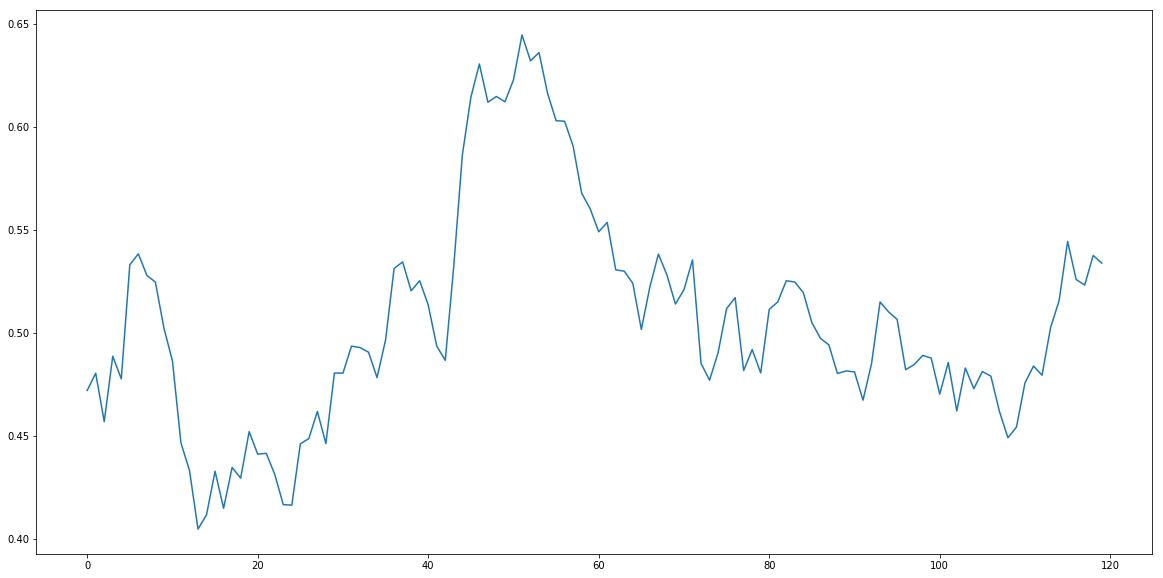

In [23]:
fig = plt.figure(figsize=(20,10))
print('DECODER FOR STIM')
to_decode = data['completed_trials_data']['correct_side']
traces = data['completed_trials_data']['traces_stim_aligned']
correct_trial_decoder = decode_one_per_timepoint(traces,to_decode)
plt.plot(correct_trial_decoder,label='correct trials only')
print("")

In [21]:
def make_one_per_timepoint_decoders(data):
    
    fig = plt.figure(figsize=(20,10))
    print('DECODER FOR CORRECT TRIALS')
    data_to_decode_inds = np.where(data['completed_trials_data']['was_correct'])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    correct_trial_decoder = decode_one_per_timepoint(traces,to_decode)
    plt.plot(correct_trial_decoder,label='correct trials only')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM LEFT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[1])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_left = decode_one_per_timepoint(traces,to_decode)
    plt.plot(resp_decoder_stim_left,label='resp given stim left')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM RIGHT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[0])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_right = decode_one_per_timepoint(traces,to_decode)
    plt.plot(resp_decoder_stim_right,label='resp given stim right')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE LEFT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[1])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_left = decode_one_per_timepoint(traces,to_decode)
    plt.plot(stim_decoder_resp_left,label='stim given resp left')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE RIGHT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[0])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_right = decode_one_per_timepoint(traces,to_decode)
    plt.plot(stim_decoder_resp_right,label='stim given resp right')
    print("")
    
    plt.legend()
    

DECODER FOR CORRECT TRIALS


0% [##############################] 100% | ETA: 00:00:00

[('left', 112), ('right', 112)]

DECODER FOR RESPONSE DIR GIVEN STIM LEFT



Total time elapsed: 00:02:21
0% [##############################] 100% | ETA: 00:00:00

[('left', 35), ('right', 35)]

DECODER FOR RESPONSE DIR GIVEN STIM RIGHT



Total time elapsed: 00:01:31
0% [##############################] 100% | ETA: 00:00:00

[('left', 20), ('right', 20)]

DECODER FOR STIM DIR GIVEN RESPONSE LEFT



Total time elapsed: 00:01:22
0% [##############################] 100% | ETA: 00:00:00

[('left', 20), ('right', 20)]

DECODER FOR STIM DIR GIVEN RESPONSE RIGHT



Total time elapsed: 00:01:24
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:34


[('left', 35), ('right', 35)]



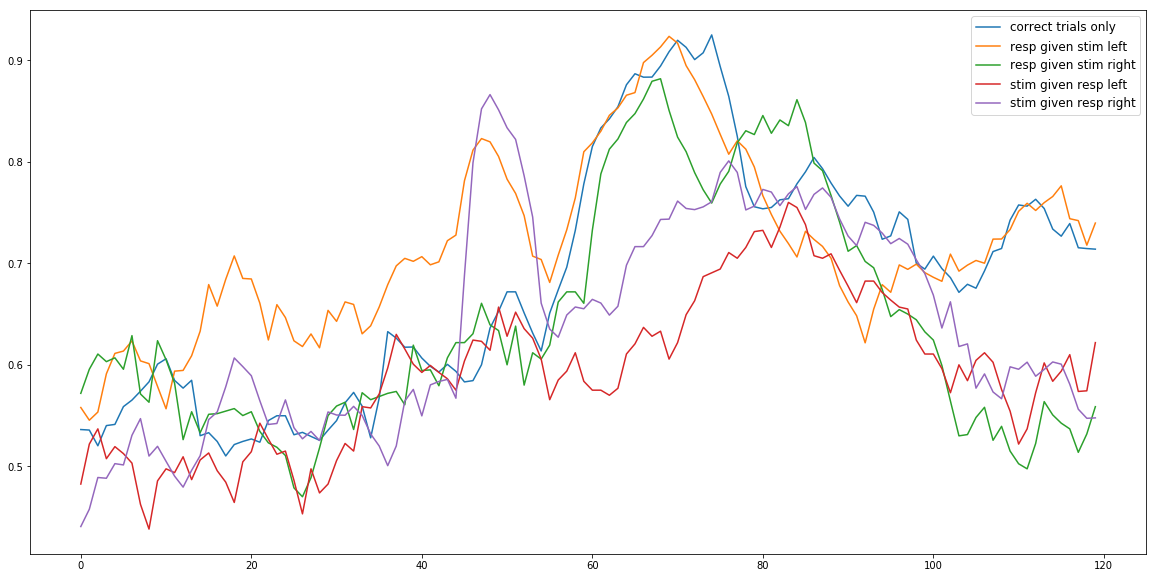

In [225]:
make_one_per_timepoint_decoders(data)

# Decode correct trials, one decoder per timepoint

In [35]:
def decode_each_timepoint_a_sample(traces,to_decode,n_repeats = 10,time_inds = np.arange(40,60)):
    repeat_data = []
    bar = pyprind.ProgBar(n_repeats, track_time=True)

    for r in range(n_repeats):
        # subsample data
        X = traces[:,:,0]
        y = to_decode
        rus = RandomUnderSampler()
        X_resampled, y_resampled = rus.fit_resample(X, y)
        rus_indices = rus.sample_indices_

        # split data into ten pieces
        np.random.shuffle(rus_indices)
        split_inds = np.array_split(rus_indices,10)


        acc_per_split = []
        for i in range(len(split_inds)):
            testing_inds = split_inds[i]
            training_inds = np.setdiff1d(rus_indices, testing_inds)

            X = traces[:,:,time_inds]
            X = X[training_inds,:,:]
            X = X.transpose(0,2,1)
            X = np.reshape(X,(X.shape[0]*X.shape[1],X.shape[2]))
            y = to_decode[training_inds] # category
            y = np.repeat(y,len(time_inds))
            model = linear_model.LogisticRegression()
            model.fit(X,y)


            # Get accuracy at every point in time of the testing data
            acc_ = [] # holds accuracy at every ppint in time for a given split
            for t in range(traces.shape[2]):
                predictions = model.predict(traces[testing_inds,:,t])
                y_ = to_decode[testing_inds]
                acc_.append(np.mean(predictions == y_))
            acc_per_split.append(acc_)    

        repeat_data.append(np.mean(acc_per_split,axis=0))
        bar.update()
    return np.mean(repeat_data,axis=0)
    



In [33]:
def make_decoder_over_all_timepoints(data):
    
    fig = plt.figure(figsize=(20,10))
    print('DECODER FOR CORRECT TRIALS')
    data_to_decode_inds = np.where(data['completed_trials_data']['was_correct'])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    correct_trial_decoder = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(correct_trial_decoder,label='correct trials only')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM LEFT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[1])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_left = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(resp_decoder_stim_left,label='resp given stim left')
    print("")
    
    print('DECODER FOR RESPONSE DIR GIVEN STIM RIGHT')
    un = np.unique(data['completed_trials_data']['correct_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['correct_side']==un[0])[0]
    to_decode = data['completed_trials_data']['response_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    resp_decoder_stim_right = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(resp_decoder_stim_right,label='resp given stim right')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE LEFT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[1])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_left = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(stim_decoder_resp_left,label='stim given resp left')
    print("")
    
    print('DECODER FOR STIM DIR GIVEN RESPONSE RIGHT')
    un = np.unique(data['completed_trials_data']['response_side'])
    data_to_decode_inds = np.where(data['completed_trials_data']['response_side']==un[0])[0]
    to_decode = data['completed_trials_data']['correct_side'][data_to_decode_inds]
    traces = data['completed_trials_data']['traces_stim_aligned'][data_to_decode_inds,:,:]
    stim_decoder_resp_right = decode_each_timepoint_a_sample(traces,to_decode)
    plt.plot(stim_decoder_resp_right,label='stim given resp right')
    print("")
    
    plt.legend()

DECODER FOR CORRECT TRIALS


0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:06


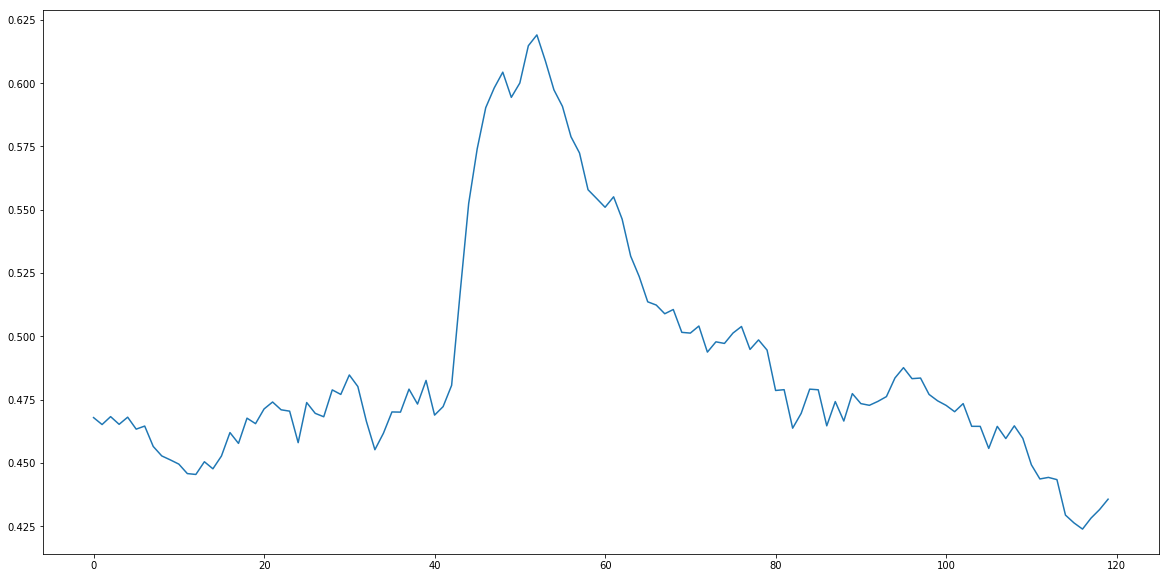

In [36]:
fig = plt.figure(figsize=(20,10))
print('DECODER FOR CORRECT TRIALS')
to_decode = data['completed_trials_data']['correct_side']
traces = data['completed_trials_data']['traces_stim_aligned']
correct_trial_decoder = decode_each_timepoint_a_sample(traces,to_decode)
plt.plot(correct_trial_decoder,label='correct trials only')
print("")

DECODER FOR CORRECT TRIALS


0% [##########] 100% | ETA: 00:00:00


DECODER FOR RESPONSE DIR GIVEN STIM LEFT



Total time elapsed: 00:00:08
0% [##########] 100% | ETA: 00:00:00


DECODER FOR RESPONSE DIR GIVEN STIM RIGHT



Total time elapsed: 00:00:03
0% [##########] 100% | ETA: 00:00:00


DECODER FOR STIM DIR GIVEN RESPONSE LEFT



Total time elapsed: 00:00:03
0% [##########] 100% | ETA: 00:00:00


DECODER FOR STIM DIR GIVEN RESPONSE RIGHT



Total time elapsed: 00:00:03
0% [##########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


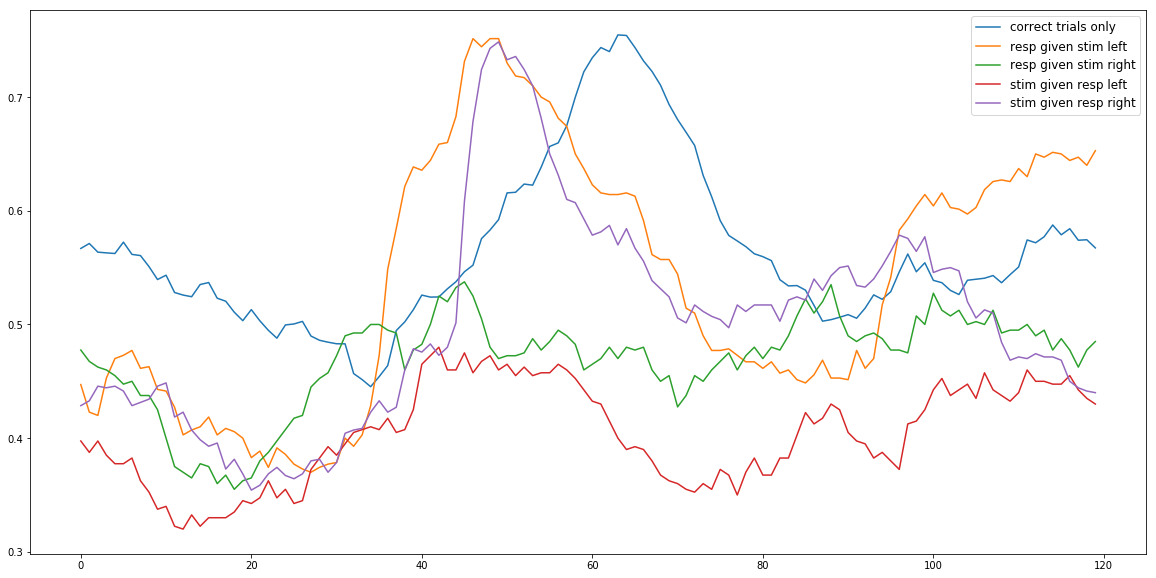

In [220]:

make_decoder_over_all_timepoints(data)

In [ ]:
# Make Subsampled Dataset 

In [227]:
data['completed_trials_data'].keys()

dict_keys(['was_completed', 'was_correct', 'correct_side', 'prior', 'noise', 'response_side', 'traces_stim_aligned', 'traces_resp_aligned', 'completed_inds', 'frame_info'])

In [281]:
independent_variable = noise
data_to_avg = data['completed_trials_data']['traces_stim_aligned']
av_traces = []
for x in np.unique(independent_variable):
    av_traces.append(np.mean(data_to_avg[np.where(independent_variable==x)[0],:,:],axis=0))
av_traces = np.array(av_traces)


In [288]:
import matplotlib.pylab as pl

def plot_av_dir_traces(n):
    #fig = plt.figure(figsize=(20,7))
    colors = pl.cm.RdBu(np.linspace(0,1,data_to_avg.shape[0]))
    #plt.subplot(1,2,1)
    for x in range(av_traces.shape[0]):
        plt.plot(np.squeeze(av_traces[x,n,:]),color = colors[x])  
    plt.plot([35,35],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([40,40],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.plot([47,47],[0,np.max(np.ravel(av_traces[:,n,:]))],'--k')
    plt.xticks([35,43], ['poke','stim'])
    plt.xlim([20,60])

In [289]:
interact(plot_av_dir_traces,n=widgets.IntSlider(min=0,max=data_to_avg.shape[1]-1,step=1,value=1))

interactive(children=(IntSlider(value=1, description='n', max=254), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_av_dir_traces(n)>

In [284]:
def plot_rasters(n):
    #fig = plt.figure(figsize=(20,7))
    #plt.subplot(1,2,1)
    plt.imshow(data_to_avg[np.argsort(independent_variable),n,:],aspect='auto')
    
    #plt.subplot(1,2,2)
    #plt.imshow(traces_resp_aligned[np.argsort(directions),n,:],aspect='auto')

In [285]:
interact(plot_rasters,n=widgets.IntSlider(min=0,max=av_traces.shape[1],step=1,value=10))

interactive(children=(IntSlider(value=10, description='n', max=255), Output()), _dom_classes=('widget-interact…

<function __main__.plot_rasters(n)>

In [277]:
stim_right = data['completed_trials_data']['correct_side']=='right'

In [279]:
noise = data['completed_trials_data']['noise']
noise[np.where(stim_right)] = -noise

In [280]:
noise

array([ 0.5 , -0.5 ,  0.5 , -0.75,  1.  ,  1.  ,  1.  ,  1.  ,  0.75,
        0.5 ,  0.5 ,  1.  ,  0.75, -0.5 , -0.5 , -1.  ,  0.75, -1.  ,
        0.75, -1.  , -1.  ,  0.25,  0.5 ,  0.75,  0.75,  0.5 ,  0.75,
       -0.75, -0.5 ,  1.  ,  0.5 ,  0.75, -0.5 ,  1.  , -1.  ,  0.5 ,
        0.75,  1.  ,  1.  ,  1.  ,  0.5 ,  0.5 , -0.75,  0.75, -0.25,
        0.25, -1.  ,  0.5 ,  0.25, -0.75,  1.  , -0.75,  0.5 , -0.25,
       -0.75,  0.5 , -0.5 ,  0.75, -0.5 ,  0.25, -0.25, -0.5 ,  0.5 ,
        0.5 ,  1.  ,  0.5 , -0.75,  0.5 ,  0.75,  1.  ,  0.75, -0.75,
       -0.5 , -0.75,  0.75, -0.75, -1.  , -1.  ,  0.5 , -0.5 ,  0.75,
       -0.75,  0.5 , -0.75, -1.  , -0.75, -0.5 , -0.75, -1.  ,  0.75,
        0.25, -1.  , -1.  , -0.5 , -0.5 ,  0.75, -0.75, -0.75, -1.  ,
        0.5 , -0.25, -0.5 , -0.5 , -0.25,  0.5 , -0.25, -1.  , -1.  ,
       -0.5 , -0.75,  0.75,  1.  , -1.  , -0.5 ,  0.5 , -0.5 , -0.75,
       -1.  , -0.25, -0.75, -0.75, -0.5 , -0.5 , -1.  , -0.5 , -0.25,
       -0.5 ,  1.  ,